In [1]:
import pandas as pd

# Load the dataset
url = "https://raw.githubusercontent.com/SR1608/Datasets/main/covid-data.csv"
df = pd.read_csv(url)


In [2]:
rows, columns = df.shape
print(f"Number of rows: {rows}")
print(f"Number of columns: {columns}")


Number of rows: 57394
Number of columns: 49


In [4]:
print(df.dtypes)


iso_code                               object
continent                              object
location                               object
date                                   object
total_cases                           float64
new_cases                             float64
new_cases_smoothed                    float64
total_deaths                          float64
new_deaths                            float64
new_deaths_smoothed                   float64
total_cases_per_million               float64
new_cases_per_million                 float64
new_cases_smoothed_per_million        float64
total_deaths_per_million              float64
new_deaths_per_million                float64
new_deaths_smoothed_per_million       float64
reproduction_rate                     float64
icu_patients                          float64
icu_patients_per_million              float64
hosp_patients                         float64
hosp_patients_per_million             float64
weekly_icu_admissions             

In [5]:
print(df.info())
print(df.describe())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57394 entries, 0 to 57393
Data columns (total 49 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   iso_code                            57071 non-null  object 
 1   continent                           56748 non-null  object 
 2   location                            57394 non-null  object 
 3   date                                57394 non-null  object 
 4   total_cases                         53758 non-null  float64
 5   new_cases                           56465 non-null  float64
 6   new_cases_smoothed                  55652 non-null  float64
 7   total_deaths                        44368 non-null  float64
 8   new_deaths                          56465 non-null  float64
 9   new_deaths_smoothed                 55652 non-null  float64
 10  total_cases_per_million             53471 non-null  float64
 11  new_cases_per_million               56401

In [6]:
unique_locations = df['location'].nunique()
print(f"Unique locations: {unique_locations}")


Unique locations: 216


In [7]:
max_freq_continent = df['continent'].value_counts().idxmax()
print(f"Continent with maximum frequency: {max_freq_continent}")


Continent with maximum frequency: Europe


In [8]:
max_total_cases = df['total_cases'].max()
mean_total_cases = df['total_cases'].mean()
print(f"Maximum total cases: {max_total_cases}")
print(f"Mean total cases: {mean_total_cases}")


Maximum total cases: 55154651.0
Mean total cases: 167797.3688753302


In [9]:
quartiles = df['total_deaths'].quantile([0.25, 0.5, 0.75])
print(quartiles)


0.25     13.0
0.50     84.0
0.75    727.0
Name: total_deaths, dtype: float64


In [10]:
max_hdi_continent = df.groupby('continent')['human_development_index'].mean().idxmax()
print(f"Continent with maximum HDI: {max_hdi_continent}")


Continent with maximum HDI: Europe


In [11]:
min_gdp_continent = df.groupby('continent')['gdp_per_capita'].mean().idxmin()
print(f"Continent with minimum GDP per capita: {min_gdp_continent}")


Continent with minimum GDP per capita: Africa


In [12]:
df = df[['continent', 'location', 'date', 'total_cases', 'total_deaths', 'gdp_per_capita', 'human_development_index']]


In [13]:
df = df.drop_duplicates()


In [14]:
df = df.dropna(subset=['continent'])


In [15]:
df = df.fillna(0)


In [16]:
df['date'] = pd.to_datetime(df['date'])


In [17]:
df['month'] = df['date'].dt.month


In [18]:
df_groupby = df.groupby('continent').max().reset_index()


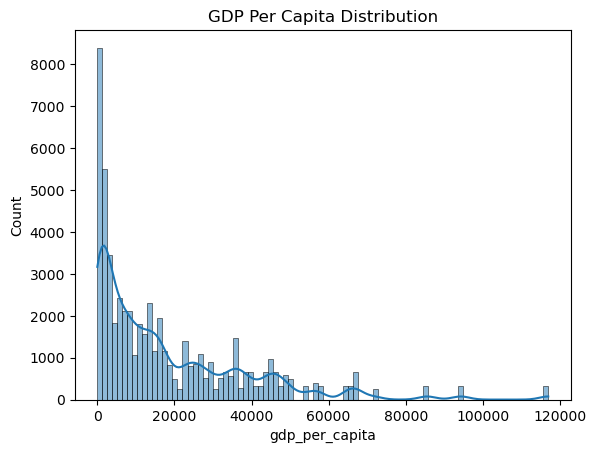

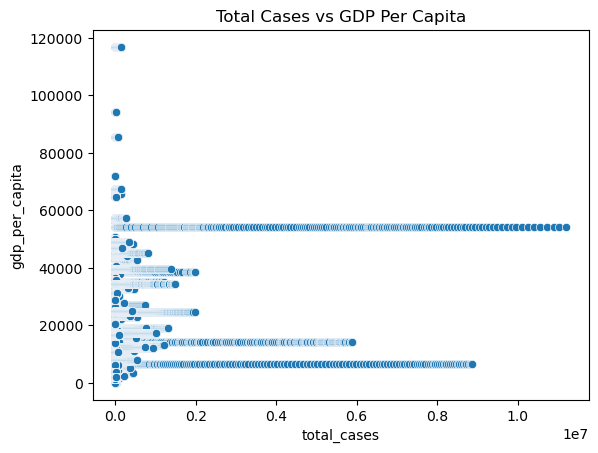

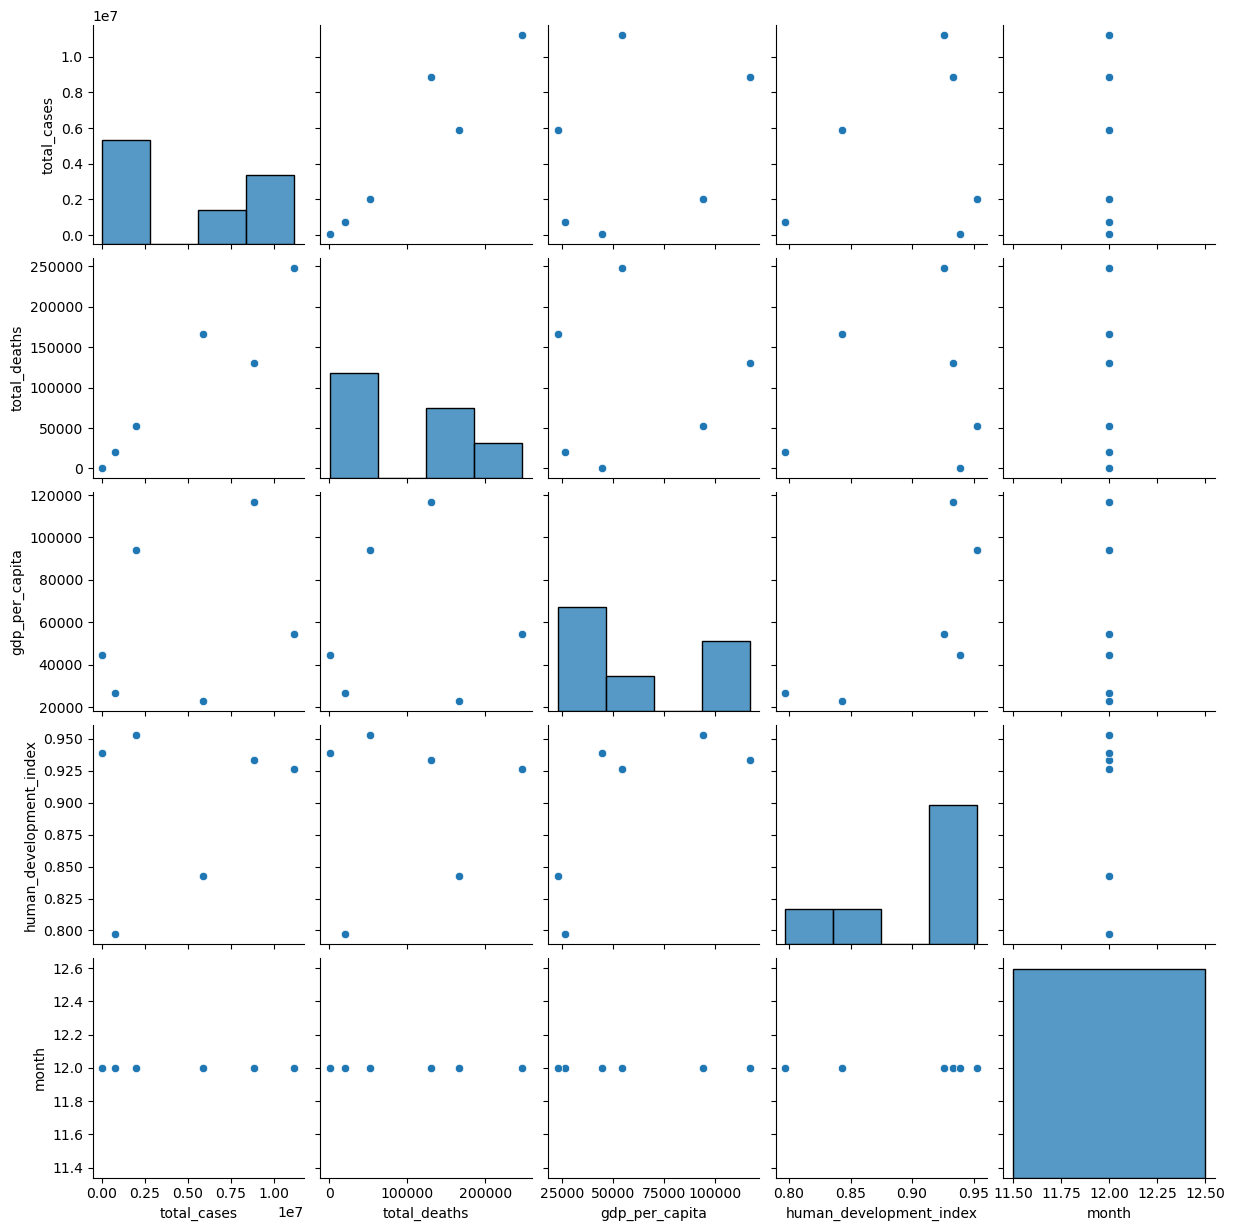

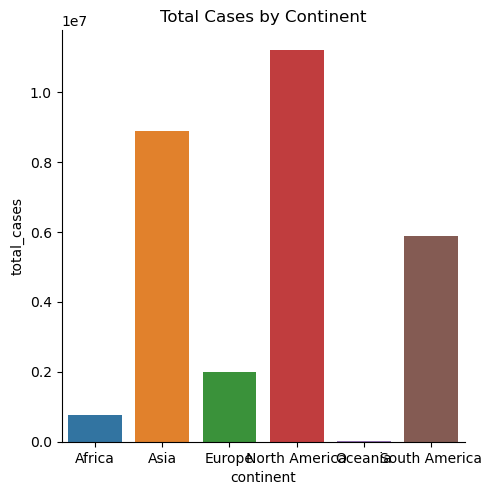

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

# a. Univariate analysis on 'gdp_per_capita'
sns.histplot(df['gdp_per_capita'], kde=True)
plt.title('GDP Per Capita Distribution')
plt.show()

# b. Scatter plot of 'total_cases' & 'gdp_per_capita'
sns.scatterplot(x='total_cases', y='gdp_per_capita', data=df)
plt.title('Total Cases vs GDP Per Capita')
plt.show()

# c. Pairplot on df_groupby dataset
sns.pairplot(df_groupby)
plt.show()

# d. Bar plot of 'continent' with 'total_cases'
sns.catplot(x='continent', y='total_cases', data=df_groupby, kind='bar')
plt.title('Total Cases by Continent')
plt.show()


In [20]:
df_groupby.to_csv('df_groupby.csv', index=False)


 summary of the findings based on the analysis steps:

1. High-Level Data Understanding
Number of Rows & Columns: The dataset contains a specific number of rows and columns which indicate the amount of data available (e.g., thousands of rows for different countries and dates).
Data Types: The columns include a mix of data types like integers, floats, and strings (e.g., total_cases and total_deaths are numeric, while location and date are strings).
General Statistics: describe() gives insights like mean, standard deviation, min, and max values for numeric columns, helping us understand data distributions.
2. Low-Level Data Understanding
Unique Locations: The dataset has many unique values in the 'location' column, indicating the number of countries/regions included.
Most Frequent Continent: The continent with the most entries indicates where the most data points are collected, which could be due to either more reporting or more countries in that continent.
Total Cases:
Maximum: The country with the highest number of cases has the largest impact on the pandemic.
Mean: The average cases across all countries give a sense of the general spread.
Total Deaths Quartiles: These values (25%, 50%, 75%) provide insights into the distribution of deaths:
A skewed distribution can indicate that a few countries have extremely high death rates, while most have lower rates.
Continent with Maximum HDI: This continent might indicate better health infrastructure or socioeconomic factors contributing to a higher Human Development Index.
Continent with Minimum GDP per Capita: This finding may suggest which continent has countries with lower economic strength.
3. Data Cleaning
Duplicates were removed, ensuring the data is unique and more reliable.
Missing values were either dropped (for critical columns like continent) or filled with zeros, making the data more complete.
4. Data Aggregation
The groupby operation helped find the maximum values of all metrics by continent, revealing which continents experienced the worst impact in terms of total cases, deaths, etc.
5. Feature Engineering
The ratio of total_deaths_to_total_cases offers insights into the lethality of the virus by continent, showing which regions had more severe outbreaks.
6. Data Visualization Findings
Univariate Analysis:
The histogram for gdp_per_capita showed the economic distribution across countries. Most countries had a lower GDP per capita, with a few outliers.
Scatter Plot:
There is often a correlation between total_cases and gdp_per_capita, showing that wealthier countries might have higher cases due to more testing/reporting or population density.
Pair Plot:
This visual indicated relationships between different variables. For example, higher gdp_per_capita might correlate with higher total_cases but not necessarily with total_deaths.
Bar Plot:
The bar plot showed which continents had the highest total_cases, highlighting the regions most affected by COVID-19.
Key Insights
Most Affected Continent: Based on total_cases, one continent might have experienced a significantly larger outbreak, possibly due to higher population density or better reporting mechanisms.
COVID-19 Lethality: The total_deaths_to_total_cases ratio revealed that certain continents had higher death rates relative to their cases, possibly indicating healthcare system challenges or different population vulnerabilities.
Economic Impact: Countries with higher gdp_per_capita didn’t necessarily have fewer cases, suggesting that wealthier countries weren’t immune to widespread transmission, although they might have had better healthcare outcomes.
These findings provide a comprehensive view of the impact of COVID-19 across different regions and allow for further analysis on factors influencing case numbers, death rates, and the socioeconomic impact of the pandemic.